<p><img src="https://networkofthrones.files.wordpress.com/2020/01/got-all8.png" style="width: 600px"></p>

Se analiza la red de co-ocurrencia de los personajes de los 5 libros de [A Song of Ice and Fire](https://www.amazon.com/Game-Thrones-Song-Fire-Boxed/dp/B010DV02GC) en [Game of Thrones](https://es.wikipedia.org/wiki/Game_of_Thrones) . Los [datos](https://github.com/Suraj-Patro/GoT_Network_Analysis/tree/main/datasets) consideran que dos personajes coexisten si sus nombres aparecen cerca de 15 palabras entre sí en los libros.

### Paso 0: Instalar e importar librerías

In [28]:
!pip install networkx
!pip install pyvis

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
import pandas as pd
import numpy as np
import requests
import io

### Paso 1: Leer la data de los 5 libros

<p>Los dataframes <em>book[0]</em> (libro 1), <em>book[1]</em> (libro 2), <em>book[2]</em> (libro 3), <em>book[3]</em> (libro 4) y <em>book[4]</em> (libro 5) resultantes tiene 5 columnas: <em>Source</em>, <em>Target</em>, <em>Type</em>, <em>weight</em> y <em>book</em></p>
<ul>
<li><b>Source</b> y <b>Target:</b> son los dos nodos que están vinculados por un arco</li>
<li><b>Type:</b> una red puede tener arcos directos o indirectos, pero en esta red todos los arcos son indirectos (ambas direcciones)</li>
<li><b>weight:</b> cada arco muestra el número de interacciones que los personajes han tenido en el libro</li>
<li><b>book:</b> el número del libro</li>
</ul>

In [16]:
# Extrayendo los archivos csv de este repositorio de GitHub: "https://github.com/Suraj-Patro/GoT_Network_Analysis/tree/main/datasets"
books = []
for i in range(5):
    url = "https://raw.githubusercontent.com/Suraj-Patro/GoT_Network_Analysis/main/datasets/book" + str(i+1) + ".csv"
    book = pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')))
    books.append(book)

# Setear el número del libro (1-5)
i = 1 # del 1 al 5
# Imprimir los primeras 5 registros del primer libro
books[i-1].head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


### Paso 2: Crear redes (networks) con pyvis

Habiendo creado los dataframes, se crearán las networks de los 5 libros para mostrar gráficamente cómo se relacionan los personajes utilizando la librería [pyvis](https://pyvis.readthedocs.io/en/latest/)

In [17]:
networks = []

for i in range(5):
    net = Network(notebook=True, height='750px', width='100%', bgcolor='#222222', font_color='white', heading='Network del libro '+str(i+1))
    net.toggle_physics(True)
    net.barnes_hut()

    sources = books[i]['Source']
    targets = books[i]['Target']
    weights = books[i]['weight']

    edge_data = zip(sources, targets, weights)

    for e in edge_data:
        src = e[0]
        dst = e[1]
        w = e[2]

        net.add_node(src, src, title=src)
        net.add_node(dst, dst, title=dst)
        net.add_edge(src, dst, value=w, title=w)

    neighbor_map = net.get_adj_list()
    edges = net.get_edges()
    nodes = net.get_nodes()

    N_nodes = len(nodes)
    N_edges = len(edges)


    weights = [[] for i in range(N_nodes)]

    # Asociando weight (pesos) a los vecinos
    for i in range(N_nodes):                     # Loop a través de los nodes (nodos)
        for neighbor in neighbor_map[nodes[i]]:  # y vecinos (neighbors)
            for j in range(N_edges): # Asociar weights (pesos) a los arcos (edges) entre nodo (node) y vecino
                if (edges[j]['from']==nodes[i] and edges[j]['to']==neighbor) or (edges[j]['from']==neighbor and edges[j]['to']==nodes[i]):
                    weights[i].append(edges[j]['value'])

    for node,i in zip(net.nodes,range(N_nodes)):
        node['value']=len(neighbor_map[node['id']])
        node['weight']=[str(weights[i][k]) for k in range(len(weights[i]))]
        list_neighbor=list(neighbor_map[node['id']]) 
        # Concatenar vecinos y pesos (weights)
        hover_str=[list_neighbor[k]+' '+ node['weight'][k] for k in range(node['value'])]
        # Configurar del título del nodo para el desplazamiento
        node['title'] =  'Vecinos de ' + node['title'] + ': '
        node['title'] += ' | '.join(hover_str)
    
    networks.append(net)

In [18]:
# Setear el número del libro (1-5)
i = 1 # del 1 al 5

networks[i-1].show('GameOfThronesNetwork.html')

### Paso 3: El personaje más importante de acuerdo a las centrality measures (medidas de centralidad)
<p>Se puede intuir que el más importante podría ser Jon Snow, Tyrion o Daenerys, ¿pero con base en qué se sustenta esto?</p>
<p>Network science (ciencia de redes) brinda diferentes métricas para medir la importancia de un nodo en una red, por lo que no existe una forma única de calcular el nodo más importante de una red, ya que cada métrica tiene un significado diferente.</p>

Existen diferentes métricas como
    [Degree Centrality](https://www.sciencedirect.com/topics/computer-science/degree-centrality#:~:text=The%20degree%20centrality%20of%20a,high%20centrality%20by%20other%20measures.), 
    [Betweenness Centrality](https://www.geeksforgeeks.org/betweenness-centrality-centrality-measure/), 
    [Page Rank](https://www.andreaperlato.com/graphpost/page-rank-in-network-analysis/),
    [Eigenvector Centrality](https://www.sciencedirect.com/topics/computer-science/eigenvector-centrality#:~:text=Eigenvector%20centrality-,Eigenvector%20centrality),
    [Closeness Centrality](https://www.sciencedirect.com/topics/computer-science/closeness-centrality#:~:text=Closeness%20centrality%20indicates%20how%20close).
   
<p>Se detectan los 5 nodos más importantes para cada libro basándose en estas métricas.</p>

In [19]:
graph_books=[]
for book in books:
    g_book=nx.Graph()
    for index,edge in book.iterrows():
        g_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    graph_books.append(g_book)

In [20]:
cent_measures = []
deg_cens, bet_cens, page_ranks, eigen_cens, close_cens = [], [], [], [], []

for i in range(5):
    cent_meas=Network(notebook=True, height='1000px', width='100%', bgcolor='#222222', font_color='white', heading='Medidas de centralidad del libro '+str(i+1))
    cent_meas.barnes_hut()
    sources=books[i]['Source']
    targets=books[i]['Target']
    weights=books[i]['weight']

    edge_data=zip(sources, targets, weights)
    degree=nx.degree(graph_books[i])

    for e in edge_data:
        src=e[0]
        dst=e[1]
        w=e[2]

        cent_meas.add_node(src, src, title=src)
        cent_meas.add_node(dst, dst, title=dst)
        cent_meas.add_edge(src, dst, value=w)
    
    deg_cen=nx.degree_centrality(graph_books[i])
    bet_cen=nx.betweenness_centrality(graph_books[i], weight='weight')
    page_rank=nx.pagerank(graph_books[i])
    eigen_cen=nx.eigenvector_centrality(graph_books[i], weight='weight')
    close_cen=nx.closeness_centrality(graph_books[i])

    for node in cent_meas.nodes:
        node['title']+=': Betweenness Centrality '+ '{0:.4f}'.format(bet_cen[node['id']]) + \
                       ' | Degree Centrality '+ '{0:.4f}'.format(deg_cen[node['id']])+ \
                       ' | Page Rank '+ '{0:.4f}'.format(page_rank[node['id']])+ \
                       ' | Eigen Centrality '+ '{0:.4f}'.format(eigen_cen[node['id']])+ \
                       ' | Closeness Centrality '+ '{0:.4f}'.format(close_cen[node['id']])
        node['value']=100*degree[node['id']]
    
    # Obtener las medidas de centralidad de cada libro
    deg_cens.append(deg_cen)
    bet_cens.append(bet_cen)
    page_ranks.append(page_rank)
    eigen_cens.append(eigen_cen)
    close_cens.append(close_cen)
    
    cent_measures.append(cent_meas)

In [21]:
# Setear el número del libro (1-5)
i=1 # del 1 al 5

print('Degree Centrality: \n', sorted(deg_cens[i-1].items(), key=lambda item: item[1], reverse=True)[0:5])
print('\nBetweenness Centrality: \n', sorted(bet_cens[i-1].items(), key=lambda item: item[1], reverse=True)[0:5])
print('\nPage Rank: \n', sorted(page_ranks[i-1].items(), key=lambda item: item[1], reverse=True)[0:5])
print('\nEigenvector Centrality: \n', sorted(eigen_cens[i-1].items(), key=lambda item: item[1], reverse=True)[0:5])
print('\nCloseness Centrality: \n', sorted(close_cens[i-1].items(), key=lambda item: item[1], reverse=True)[0:5])

cent_measures[i].show('gameofthrones.html')

Degree Centrality: 
 [('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572)]

Betweenness Centrality: 
 [('Robert-Baratheon', 0.23341885664466297), ('Eddard-Stark', 0.18703429235687297), ('Tyrion-Lannister', 0.15311225972516293), ('Robb-Stark', 0.1024018949825402), ('Catelyn-Stark', 0.10169012330302643)]

Page Rank: 
 [('Eddard-Stark', 0.07236162026570053), ('Robert-Baratheon', 0.04849367196106828), ('Jon-Snow', 0.04770801150205559), ('Tyrion-Lannister', 0.04367631315626212), ('Catelyn-Stark', 0.03466661321136357)]

Eigenvector Centrality: 
 [('Eddard-Stark', 0.5607183572126583), ('Robert-Baratheon', 0.5135411676570388), ('Cersei-Lannister', 0.2374342549034348), ('Sansa-Stark', 0.1858542746079821), ('Petyr-Baelish', 0.18261051806898293)]

Closeness Centrality: 
 [('Eddard-Stark', 0.5636363636363636), ('Robert-Baratheon', 0.5454545454545454), ('T

### Paso 4: Evolución de la importancia de los personajes en los 5 libros
<p>Se ve que la importancia de Eddard Stark desaparece a medida que avanza la serie de libros, pero deja de aparecer del top 5 en el quinto libro (de acuerdo a las 4 primeras métricas). Con Jon Snow, hay una caída en el cuarto libro pero un aumento repentino en el quinto libro. Asimismo, tener en cuenta la evolución de personajes como Robert-Baratheon y Tyrion-Lannister</p>
<p>También se identifica un aumento peculiar en la importancia de Stannis Baratheon sobre los libros. En el quinto libro, es significativamente más importante que otros personajes de la red, aunque es el tercer personaje más importante según el grado de centralidad.</p>

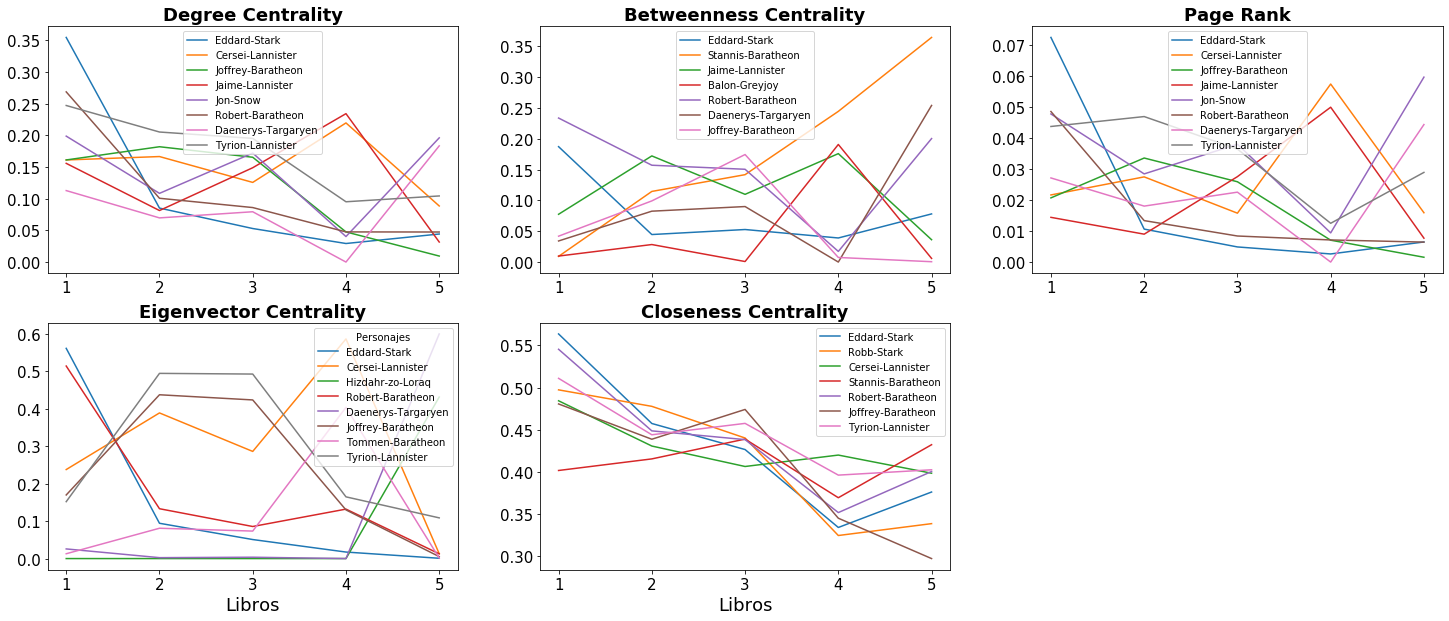

In [22]:
# Crear listas de las métricas para todos los libros
deg_cen_total = [nx.degree_centrality(graph) for graph in graph_books]
bet_cen_total = [nx.betweenness_centrality(graph, weight='weight') for graph in graph_books]
page_rank_total = [nx.pagerank(graph) for graph in graph_books]
eigen_cen_total = [nx.eigenvector_centrality(graph, weight='weight') for graph in graph_books]
close_cen_total = [nx.closeness_centrality(graph) for graph in graph_books]

graph_metrics_total = [deg_cen_total, bet_cen_total, page_rank_total, eigen_cen_total, close_cen_total]

fig, axes = plt.subplots(nrows=2, ncols=3)

for metric_total in graph_metrics_total:
    # Convertir lista a dataframe
    metric_total_df = pd.DataFrame.from_records(metric_total).fillna(0)

    # Top personajes para cada libro
    set_of_char = set()
    for i in range(5):
        set_of_char |= set(list(metric_total_df.T[i].sort_values(ascending=False)[0:2].index))

    df =  metric_total_df[list(set_of_char)]

    # Graficar el evolutivo de los colaboradores
    df.index = np.arange(1, len(df)+1)

    if graph_metrics_total.index(metric_total) == 0:
        df.plot(ax=axes[0,0], figsize=(25, 12), xticks=df.index, fontsize=15)
        axes[0,0].set_title('Degree Centrality',fontweight="bold", size=18)
    elif graph_metrics_total.index(metric_total) == 1:
        df.plot(ax=axes[0,1], figsize=(25, 12), xticks=df.index, fontsize=15)
        axes[0,1].set_title('Betweenness Centrality',fontweight="bold", size=18)
    elif graph_metrics_total.index(metric_total) == 2:
        df.plot(ax=axes[0,2], figsize=(25, 12), xticks=df.index, fontsize=15)
        axes[0,2].set_title('Page Rank',fontweight="bold", size=18)
    elif graph_metrics_total.index(metric_total) == 3:
        df.plot(ax=axes[1,0], figsize=(25, 12), xticks=df.index, fontsize=15)
        axes[1,0].set_title('Eigenvector Centrality',fontweight="bold", size=18)
        axes[1,0].set_xlabel('Libros', size=18)
        axes[1,0].legend(loc='upper right', title='Personajes')
    elif graph_metrics_total.index(metric_total) == 4:
        df.plot(ax=axes[1,1], figsize=(25, 10), xticks=df.index, fontsize=15)
        axes[1,1].set_title('Closeness Centrality',fontweight="bold", size=18)
        axes[1,1].set_xlabel('Libros', size=18)
fig.delaxes(axes[1,2]) 

### Paso 5: Correlation between different measures
<p>Se han propuesto 5 métricas para calcular la importancia de un nodo en la red de co-ocurrencia. Aparecen algunos nombres en diferentes órdenes para cada una de las medidas, así que es probable que haya una relevante correlación entre ellos.</p>
<p>Por ello, se muestra la correlación entre las métricas Degree Centrality, Betweenness Centrality, Page Rank, Eigenvector Centrality y Closeness Centrality para cada libro usando la correlación de Pearson.</p>

In [23]:
def resumen(i):
    # Crear una lista de las métricas de todos los personajes
    measures = [nx.degree_centrality(graph_books[i-1]),
                nx.betweenness_centrality(graph_books[i-1], weight='weight'),
                nx.pagerank(graph_books[i-1]), 
                nx.eigenvector_centrality(graph_books[i-1], weight='weight'),
                nx.closeness_centrality(graph_books[i-1])]

    # Crear el dataframe de correlación
    resumen = pd.DataFrame.from_records(measures, index=['deg_cen', 'bet_cen', 'page_rank', 'eigen_cen', 'close_cen'])
    return resumen

# Setear el número del libro (1-5)
i = 1 
resumen(i) # del 1 al 5

,Addam-Marbrand,Jaime-Lannister,Tywin-Lannister,Aegon-I-Targaryen,Daenerys-Targaryen,Eddard-Stark,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Bowen-Marsh,Chett,...,Lancel-Lannister,Leo-Lefford,Mace-Tyrell,Lyn-Corbray,Paxter-Redwyne,Maegor-I-Targaryen,Mord,Randyll-Tarly,Timett,Ulf-son-of-Umar
deg_cen,0.010753,0.155914,0.118280,0.010753,0.112903,0.354839,0.037634,0.053763,0.026882,0.016129,...,0.005376,0.005376,0.010753,0.005376,0.005376,0.005376,0.005376,0.005376,0.010753,0.005376
bet_cen,0.000000,0.077451,0.041211,0.000000,0.034182,0.187034,0.010753,0.026584,0.000814,0.002209,...,0.000000,0.000000,0.010753,0.000000,0.000000,0.000000,0.000000,0.000000,0.009085,0.000000
page_rank,0.001276,0.014403,0.011424,0.001254,0.027099,0.072362,0.005812,0.005356,0.002361,0.001945,...,0.000934,0.001031,0.002618,0.000983,0.001916,0.000970,0.001945,0.001081,0.001487,0.001316
eigen_cen,0.001551,0.103790,0.068416,0.005096,0.025726,0.560718,0.013992,0.015771,0.004776,0.002120,...,0.003310,0.001304,0.000201,0.000310,0.000001,0.001597,0.006522,0.000346,0.001028,0.000049
close_cen,0.323478,0.461538,0.449275,0.376518,0.405229,0.563636,0.336957,0.363281,0.335740,0.333333,...,0.353612,0.338798,0.286154,0.300971,0.222754,0.329204,0.338798,0.263830,0.340659,0.256198


In [24]:
cor = resumen(i).T.corr()
cor = cor.rename(columns = {0:'deg_cen', 1:'bet_cen', 2:'page_rank', 3:'eigen_cen', 4:'close_cen'})
print(cor, "\n")
print(cor.sum().sort_values(ascending=False))

            deg_cen   bet_cen  page_rank  eigen_cen  close_cen
deg_cen    1.000000  0.871385   0.949258   0.887377   0.796965
bet_cen    0.871385  1.000000   0.870210   0.805318   0.675276
page_rank  0.949258  0.870210   1.000000   0.888918   0.686706
eigen_cen  0.887377  0.805318   0.888918   1.000000   0.697500
close_cen  0.796965  0.675276   0.686706   0.697500   1.000000 

deg_cen      4.504984
page_rank    4.395092
eigen_cen    4.279114
bet_cen      4.222188
close_cen    3.856448
dtype: float64


### Paso 6: Conclusión
<p> Se evidencia una alta correlación entre las medidas para la red de co-ocurrencia de personajes; sin embargo, se considerará como umbral 0.7 para definir si la correlación es alta o no. Por ello, debido a que el coeficiente de correlación de la medida Closeness Centrality con la mayoría de medidas es menor a este valor, no se tendrán en cuenta los resultados de esta medida.

Así que hemos estado buscando diferentes formas de encontrar los personajes importantes en la red de co-ocurrencia de Game of Thrones. Según la centralidad del grado, Eddard Stark es el personaje más importante inicialmente en los libros. Pero, ¿quiénes son los personajes más importantes del quinto libro según estas tres medidas?</p>

In [25]:
df = pd.DataFrame(index=['Degree centrality', 'Betweenness centrality', 'PageRank', 'Eigenvector centrality', 'Personaje más importante'])

for i in range(1,6):
    personajes_importantes = resumen(i).idxmax(axis=1)[:-1].to_list()
    df['Libro '+str(i)] = personajes_importantes + max(set(personajes_importantes), key = personajes_importantes.count).split(" ")
df

,Libro 1,Libro 2,Libro 3,Libro 4,Libro 5
Degree centrality,Eddard-Stark,Tyrion-Lannister,Tyrion-Lannister,Jaime-Lannister,Jon-Snow
Betweenness centrality,Robert-Baratheon,Jaime-Lannister,Joffrey-Baratheon,Stannis-Baratheon,Stannis-Baratheon
PageRank,Eddard-Stark,Tyrion-Lannister,Jon-Snow,Cersei-Lannister,Jon-Snow
Eigenvector centrality,Eddard-Stark,Tyrion-Lannister,Tyrion-Lannister,Cersei-Lannister,Daenerys-Targaryen
Personaje más importante,Eddard-Stark,Tyrion-Lannister,Tyrion-Lannister,Cersei-Lannister,Jon-Snow


In [26]:
from IPython.display import display, HTML

display(HTML(df.to_html().replace("-","<br>")))

,Libro 1,Libro 2,Libro 3,Libro 4,Libro 5
Degree centrality,EddardStark,TyrionLannister,TyrionLannister,JaimeLannister,JonSnow
Betweenness centrality,RobertBaratheon,JaimeLannister,JoffreyBaratheon,StannisBaratheon,StannisBaratheon
PageRank,EddardStark,TyrionLannister,JonSnow,CerseiLannister,JonSnow
Eigenvector centrality,EddardStark,TyrionLannister,TyrionLannister,CerseiLannister,DaenerysTargaryen
Personaje más importante,EddardStark,TyrionLannister,TyrionLannister,CerseiLannister,JonSnow
